In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import opendatasets as od

In [3]:
#od.download('https://www.kaggle.com/datasets/saurabh00007/iriscsv')

In [4]:
df=pd.read_csv('Iris.csv')

In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [39]:
df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
138,139,6.0,3.0,4.8,1.8,Iris-virginica
40,41,5.0,3.5,1.3,0.3,Iris-setosa
18,19,5.7,3.8,1.7,0.3,Iris-setosa
106,107,4.9,2.5,4.5,1.7,Iris-virginica


In [6]:
df.shape

(150, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
df.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


In [11]:
flower_name=df['Species'].value_counts().index

In [12]:
flower_count=df['Species'].value_counts().values

([<matplotlib.patches.Wedge at 0x19cd707b130>,
 [Text(0.5499999702695115, 0.9526279613277875, 'Iris-setosa'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, 'Iris-versicolor'),
  Text(0.5500001486524352, -0.9526278583383436, 'Iris-virginica')],
 [Text(0.2999999837833699, 0.5196152516333385, '33.33'),
  Text(-0.5999999999999974, -5.6176054134900006e-08, '33.33'),
  Text(0.30000008108314646, -0.5196151954572783, '33.33')])

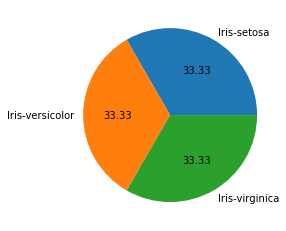

In [13]:
plt.pie(x=flower_count,labels=flower_name,autopct='%.2f')

In [14]:
num_cols=df.select_dtypes(include=['float64'])

array([[<AxesSubplot:title={'center':'SepalLengthCm'}>,
        <AxesSubplot:title={'center':'SepalWidthCm'}>],
       [<AxesSubplot:title={'center':'PetalLengthCm'}>,
        <AxesSubplot:title={'center':'PetalWidthCm'}>]], dtype=object)

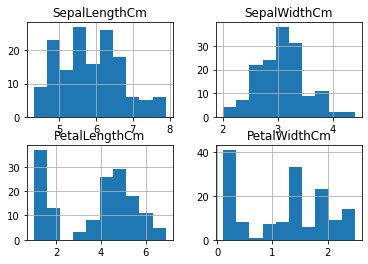

In [15]:
num_cols.hist()

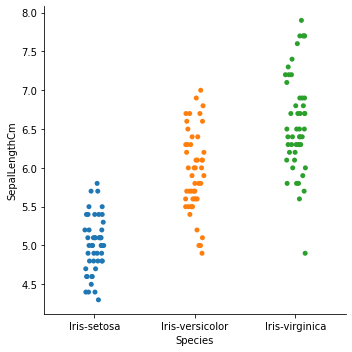

In [16]:
sns.catplot(data=df, x="Species", y="SepalLengthCm")

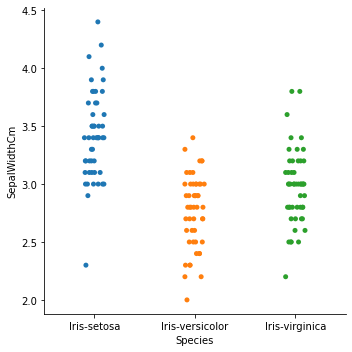

In [17]:
sns.catplot(data=df, x="Species", y="SepalWidthCm")

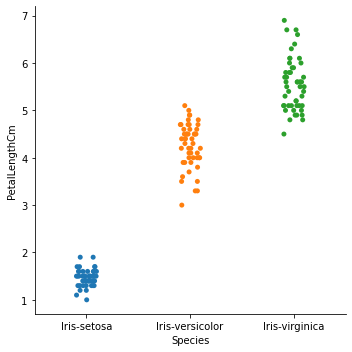

In [18]:
sns.catplot(data=df, x="Species", y="PetalLengthCm")    

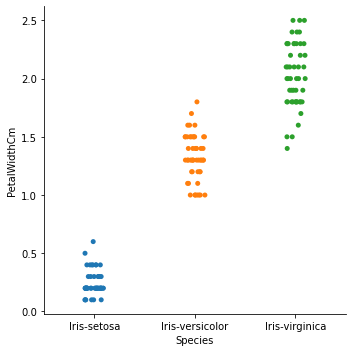

In [19]:
sns.catplot(data=df, x="Species", y="PetalWidthCm")

In [20]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [21]:
lb=LabelEncoder()

In [22]:
x=df.drop(['Id','Species'],axis=1)

In [23]:
y=df['Species']

In [24]:
y=lb.fit_transform(y)

In [26]:
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=42,test_size=0.2)

In [27]:
trf1=ColumnTransformer([('scaling',StandardScaler(),[0,1,2,3])])


In [28]:
estimator = DecisionTreeClassifier()

In [29]:
pipe = Pipeline(steps=[('trf1', trf1), ('estimator', estimator)])

In [30]:
pipe

Pipeline(steps=[('trf1',
                 ColumnTransformer(transformers=[('scaling', StandardScaler(),
                                                  [0, 1, 2, 3])])),
                ('estimator', DecisionTreeClassifier())])

In [31]:
pipe.fit(train_x,train_y)

Pipeline(steps=[('trf1',
                 ColumnTransformer(transformers=[('scaling', StandardScaler(),
                                                  [0, 1, 2, 3])])),
                ('estimator', DecisionTreeClassifier())])

In [32]:
pred=pipe.predict(train_x)

In [33]:
accuracy_score(pred,train_y)

1.0

In [34]:
scores = cross_val_score(pipe, x, y, cv=5)

In [35]:
scores.mean()

0.9600000000000002

In [36]:
import pickle

In [37]:
pickle.dump(pipe,open('pipe.pkl','wb'))